# Task 2: Basic Probabilities and Visualizations (2)

### Listing A.2: Task-2: Trapezoidal rule calculation for P (2 <= Y <= 4)

In [1]:
import numpy as np

# Function definition
def f(y):
    return np.exp(-2 * y**2)

# Parameters
a, b = 2, 4  # Integration bounds
n = 1000  # Number of intervals for higher accuracy

# Discretize the interval
y_values = np.linspace(a, b, n + 1)  # n+1 to devide the interval [a,b] into exactly n subintervals
f_values = f(y_values)  # Evaluate the function at each point

# Use NumPy's trapezoidal rule
integral = np.trapz(f_values, y_values)  # Trapezoidal integration

# Multiply by the constant (29/99), format and print the result
result = 29 / 99 * integral
print(f"Integral = {integral:.10f}")
print(f"P(y)     = {result:.10f}")


Integral = 0.0000396949
P(y)     = 0.0000116278


### Listing A.3: Task-2: Probability Density Function (PDF) and Histogram plotting

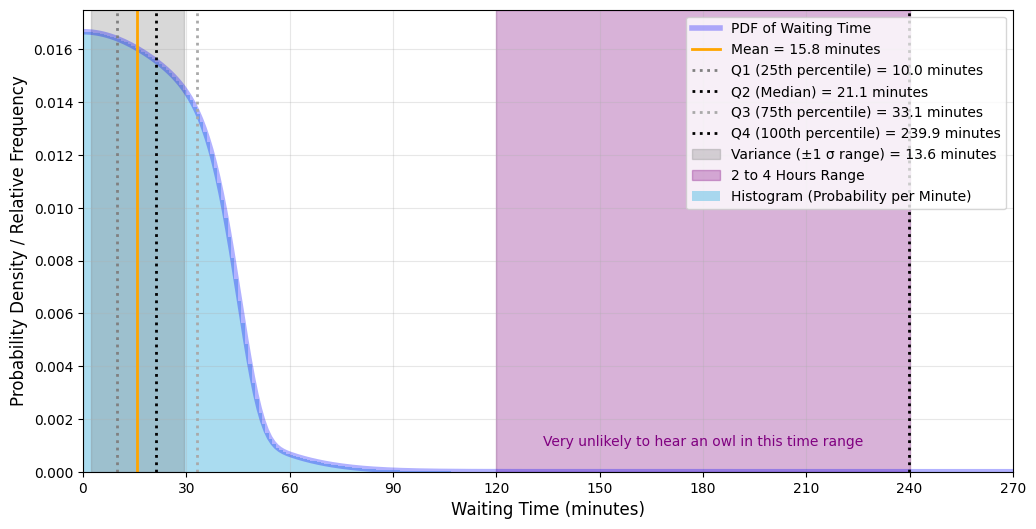

Mean of waiting time: 15.8 minutes
Variance of waiting time: 184.7 minutes²
Quartiles (Q1, Median, Q3, Q4): [10.0, 21.1, 33.1, 239.9] minutes


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Parameters and PDF definition
xi5, xi6, xi7, xi8 = 29 / 99, 2, 70 / 99, 8
def pdf(y): return xi5 * np.exp(-xi6 * y**2) + xi7 * np.exp(-xi8 * y**8)

# Range of y in minutes
y_minutes = np.linspace(0, 270, 270)  # Extended range to 270 minutes (4.5 hours)
pdf_values_minutes = pdf(y_minutes / 60) / 60  # Convert minutes to hours for PDF evaluation

# Compute statistics entirely in minutes
mean_minutes, _ = quad(lambda y: y * pdf(y / 60) / 60, 0, 270)  # Mean in minutes
variance_minutes, _ = quad(lambda y: ((y - mean_minutes)**2) * pdf(y / 60) / 60, 0, 270)  # Variance in minutes²
cdf_values = np.cumsum(pdf_values_minutes) * (y_minutes[1] - y_minutes[0])  # Approximate CDF
quartiles_minutes = [y_minutes[np.searchsorted(cdf_values / cdf_values[-1], q)] for q in [0.25, 0.5, 0.75, 1.0]]  # Q1, Median, Q3, Q4

# Plot PDF and Histogram
plt.figure(figsize=(12, 6))
plt.plot(y_minutes, pdf_values_minutes, color="blue", alpha=0.3, label="PDF of Waiting Time", linewidth=4)

# Histogram (1-minute bins, scaled to probabilities)
bin_edges = np.arange(0, 271, 1)  # 1-minute bins
y_hist_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
weights = pdf(y_hist_centers / 60) / 60 * (bin_edges[1] - bin_edges[0])
plt.bar(y_hist_centers, weights, width=1, alpha=0.7, color="skyblue", label="Histogram (Probability per Minute)")

# Vertical lines for statistics
plt.axvline(mean_minutes, color="orange", linestyle="-", linewidth=2, label=f"Mean = {mean_minutes:.1f} minutes")
plt.axvline(quartiles_minutes[0], color="grey", linestyle="dotted", linewidth=2, label=f"Q1 (25th percentile) = {quartiles_minutes[0]:.1f} minutes")
plt.axvline(quartiles_minutes[1], color="black", linestyle="dotted", linewidth=2, label=f"Q2 (Median) = {quartiles_minutes[1]:.1f} minutes")
plt.axvline(quartiles_minutes[2], color="darkgrey", linestyle="dotted", linewidth=2, label=f"Q3 (75th percentile) = {quartiles_minutes[2]:.1f} minutes")
plt.axvline(quartiles_minutes[3], color="black", linestyle="dotted", linewidth=2, label=f"Q4 (100th percentile) = {quartiles_minutes[3]:.1f} minutes")

# Standard deviation range (shaded region)
std_dev_minutes = np.sqrt(variance_minutes)
plt.axvspan(mean_minutes - std_dev_minutes, mean_minutes + std_dev_minutes, color="grey", alpha=0.3, label=f"Variance (±1 σ range) = {std_dev_minutes:.1f} minutes")

# 2 to 4 hours range (shaded purple region)
plt.axvspan(120, 240, color="purple", alpha=0.3, label="2 to 4 Hours Range")
plt.text(180, 0.001, "Very unlikely to hear an owl in this time range", fontsize=10, color="purple", ha="center")

# Finalize plot
# plt.title("Histogram and PDF of Hearing an Owl (Minutes)", fontsize=12)
plt.xlabel("Waiting Time (minutes)", fontsize=12)
plt.ylabel("Probability Density / Relative Frequency", fontsize=12)
plt.legend(fontsize=10, loc="upper right")
plt.xticks(ticks=np.arange(0, 271, 30))  # X-axis ticks every 30 minutes
plt.grid(alpha=0.3)
plt.xlim(0, 270)
plt.show()

# Display results
print(f"Mean of waiting time: {mean_minutes:.1f} minutes")
print(f"Variance of waiting time: {variance_minutes:.1f} minutes²")
print(f"Quartiles (Q1, Median, Q3, Q4): {[round(q, 1) for q in quartiles_minutes]} minutes")
